In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train= pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.shape


(1460, 81)

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

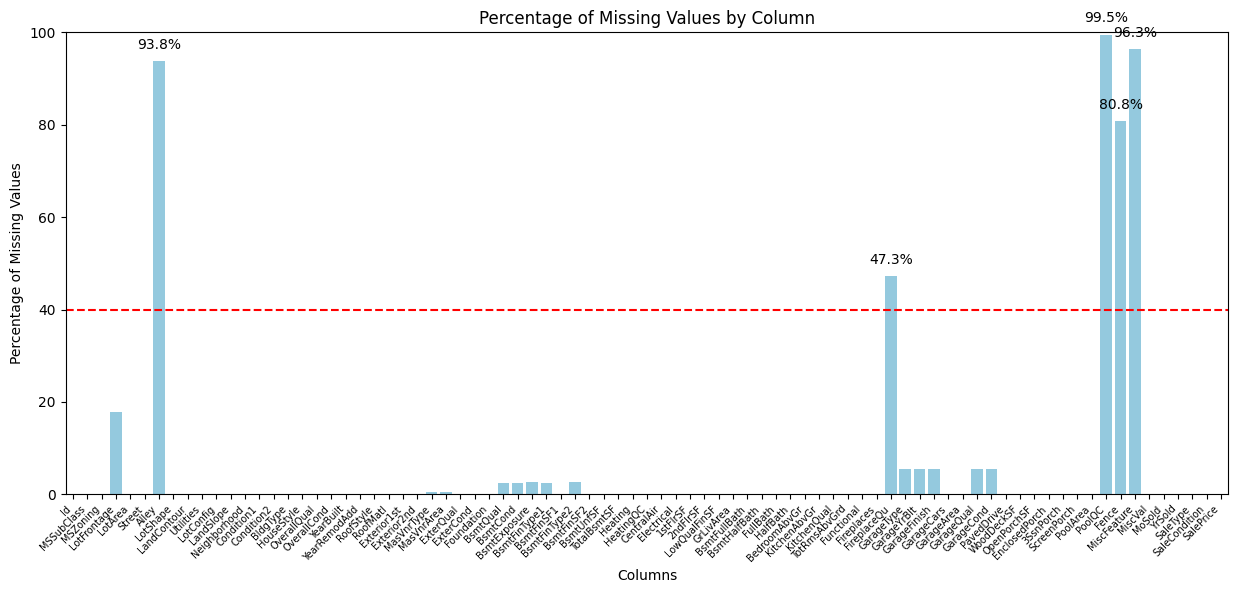

In [8]:

def bar_nanValue(x):                                                # Function to show missing values in the column to drop the column
    
    missing_percent = x.isnull().mean() * 100
    
    # Plotting the bar plot
    plt.figure(figsize=(15, 6))
    sns.barplot(x=missing_percent.index, y=missing_percent, color='skyblue')
    plt.axhline(y=40, color='r', linestyle='--')
    plt.title('Percentage of Missing Values by Column')
    plt.xticks(rotation=45, ha='right',fontsize=7)
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.ylim(0, 100)  # Set limit to 100% for better visualization
    
    
    for i, value in enumerate(missing_percent):
        if value > 40:
            plt.text(i, value + 2, f'{value:.1f}%', ha='center', va='bottom', color='black')
    
    plt.show()

bar_nanValue(train)


In [9]:
def filling_na(df):
    # Define mode and mean values

    # Handle Electrical column
    

    # Define columns with NA values and their placeholders
    columns_with_na = {
        'Alley': 'NoAlleyAccess',
        'GarageType': 'NoGarage',
        'GarageFinish': 'NoGarage',
        'GarageQual': 'NoGarage',
        'GarageCond': 'NoGarage',
        'BsmtQual': 'NoBasement',
        'BsmtCond': 'NoBasement',
        'BsmtExposure': 'NoBasement',
        'BsmtFinType1': 'NoBasement',
        'BsmtFinType2': 'NoBasement',
        'PoolQC': 'NoPool',
        'Fence': 'NoFence',
        'MiscFeature': 'None',
        'FireplaceQu': 'NoFireplace',
        'MasVnrType' : 'None'
    }

    # Fill NA values with the defined placeholders
    for col, placeholder in columns_with_na.items():
        if col in df.columns:
            df[col] = df[col].fillna(placeholder)

    # Impute missing LotFrontage with the median value of the same neighborhood
    if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
        df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # Additional NA replacements for specific columns
    na_replacements = {
        'GarageQual': 'NoGarage',
        'GarageCond': 'NoGarage',
        'BsmtQual': 'NoBasement',
        'BsmtCond': 'NoBasement',
        'PoolQC': 'NoPool',
        'Fence': 'NoFence'
    }

    for col, replacement in na_replacements.items():
        if col in df.columns:
            df[col] = df[col].fillna(replacement)


    
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    df['MasVnrArea']= df['MasVnrArea'].fillna(0)
    df['Electrical']= df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    return df

In [10]:
filling_na(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,NoPool,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,NoPool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,4,2010,WD,Normal,142125


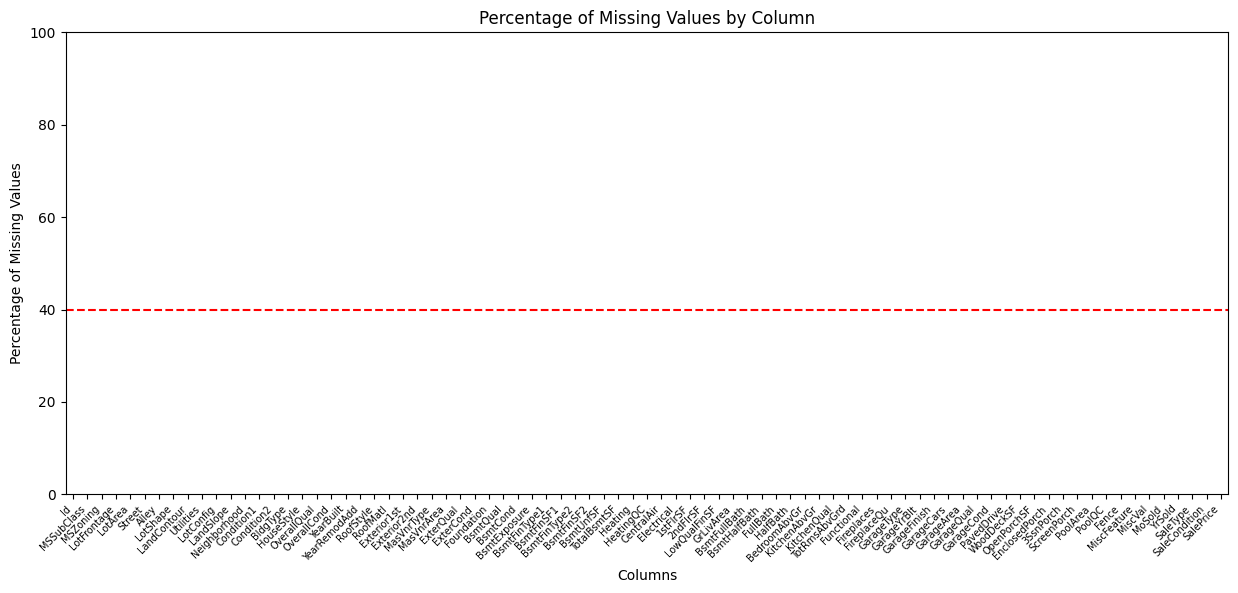

In [11]:
bar_nanValue(train)


In [12]:
test= pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
test.shape

(1459, 80)

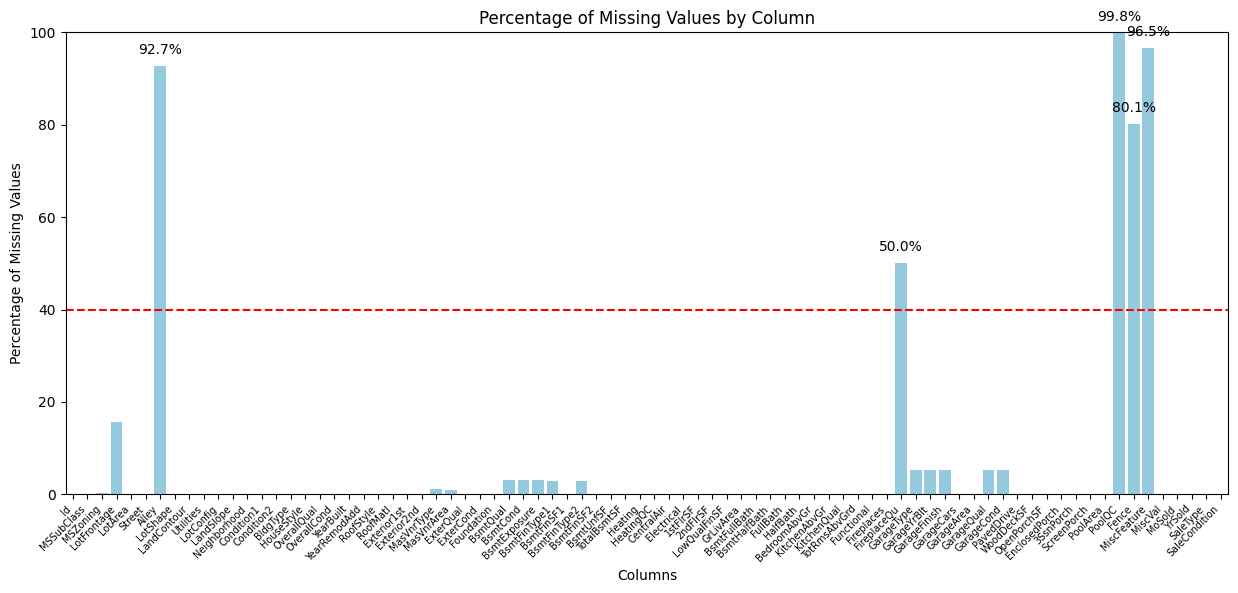

In [16]:
bar_nanValue(test)

In [17]:
filling_na(test)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,120,0,NoPool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,0,0,NoPool,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NoAlleyAccess,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NoAlleyAccess,IR1,HLS,AllPub,...,144,0,NoPool,NoFence,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,0,NoPool,NoFence,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NoAlleyAccess,Reg,Lvl,AllPub,...,0,0,NoPool,MnPrv,Shed,700,7,2006,WD,Normal


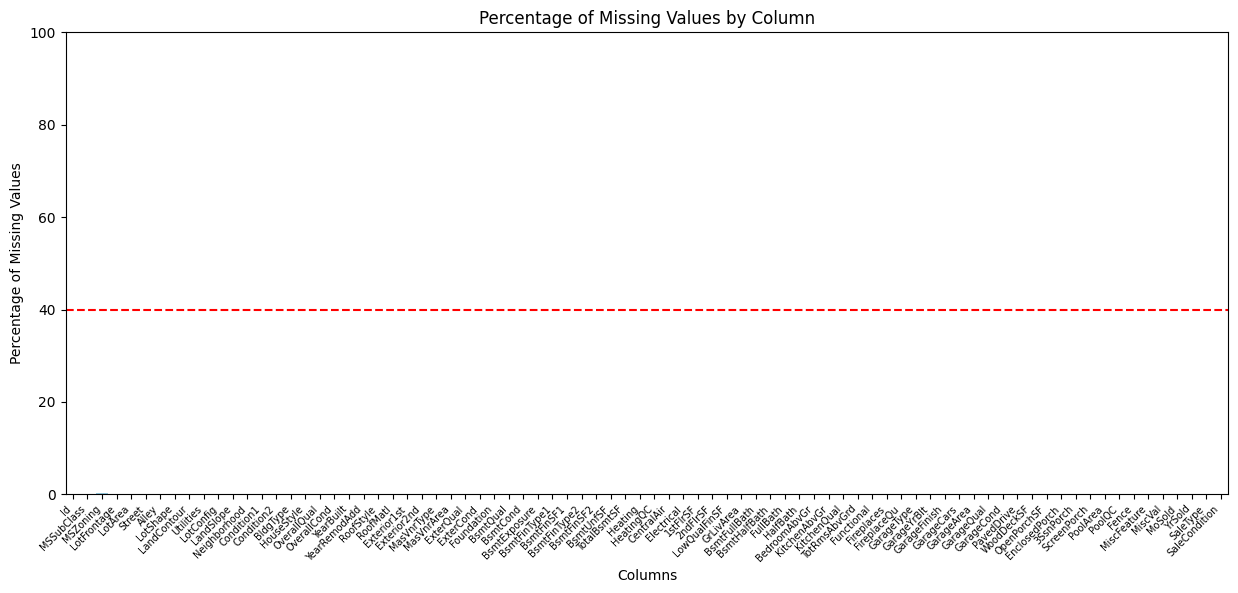

In [18]:
bar_nanValue(test)

In [19]:
colT= test.columns
for i in colT:
    if test[i].isnull().sum() >0:
        print(i)

MSZoning
Utilities
Exterior1st
Exterior2nd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageCars
GarageArea
SaleType


In [20]:
null_columns = test.columns[test.isnull().any()]
df_nulls= test[null_columns]

rows_with_nulls = df_nulls.isnull().any(axis=1)
df_with_nulls_only = df_nulls[rows_with_nulls]
df_with_nulls_only

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
95,RL,AllPub,Wd Sdng,Wd Sdng,0.0,0.0,689.0,689.0,0.0,0.0,NaN,Mod,1.0,180.0,COD
455,NaN,NaN,Wd Sdng,Wd Sdng,0.0,0.0,0.0,0.0,0.0,0.0,TA,Min1,1.0,280.0,ConLD
485,RL,NaN,BrkFace,BrkFace,0.0,0.0,1632.0,1632.0,0.0,0.0,TA,Min2,2.0,495.0,WD
660,RM,AllPub,MetalSd,CBlock,NaN,NaN,NaN,NaN,NaN,NaN,TA,Typ,1.0,280.0,ConLD
691,RL,AllPub,NaN,NaN,1035.0,0.0,545.0,1580.0,1.0,0.0,Fa,Typ,0.0,0.0,WD
728,RL,AllPub,Plywood,Plywood,0.0,0.0,0.0,0.0,NaN,NaN,Ex,Typ,2.0,624.0,WD
756,NaN,AllPub,AsbShng,VinylSd,0.0,0.0,0.0,0.0,0.0,0.0,Fa,NaN,2.0,487.0,WD
790,NaN,AllPub,Wd Sdng,Wd Sdng,0.0,0.0,686.0,686.0,0.0,0.0,TA,Maj1,1.0,288.0,WD
1013,RM,AllPub,Wd Sdng,Wd Sdng,0.0,0.0,771.0,771.0,0.0,0.0,TA,NaN,1.0,264.0,COD
1029,RL,AllPub,Plywood,Plywood,190.0,873.0,95.0,1158.0,1.0,0.0,TA,Typ,1.0,303.0,NaN


In [21]:
df_with_nulls_only.shape

(12, 15)

In [22]:
test['GarageArea']= test['GarageArea'].fillna(0)
test['MSZoning']= test ['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities']= test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']= test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']= test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinSF1']= test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2']= test['BsmtFinSF2'].fillna(0)
test['BsmtUnfSF']= test['BsmtUnfSF'].fillna(0)
test['TotalBsmtSF']= test['TotalBsmtSF'].fillna(0)
test['BsmtFullBath']= test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath']= test['BsmtHalfBath'].fillna(0)
test['KitchenQual']= test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageCars']= test['GarageCars'].fillna(0)
test['SaleType']= test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Functional']= test['Functional'].fillna(test['Functional'].mode()[0])
                                                

In [23]:
for i in colT:
    if test[i].isnull().sum() >0:
        print(i)

In [24]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Figure size 1000x500 with 0 Axes>

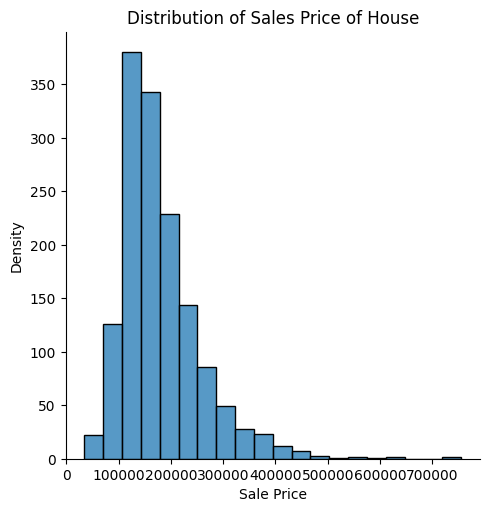

In [25]:
plt.figure(figsize=(10,5))
sns.displot(train['SalePrice'],bins=20)
plt.title('Distribution of Sales Price of House')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()


In [26]:
numerical_col= train.select_dtypes(include=['number']).columns.tolist()
numerical_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
categorical_col = train.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
train[numerical_col].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

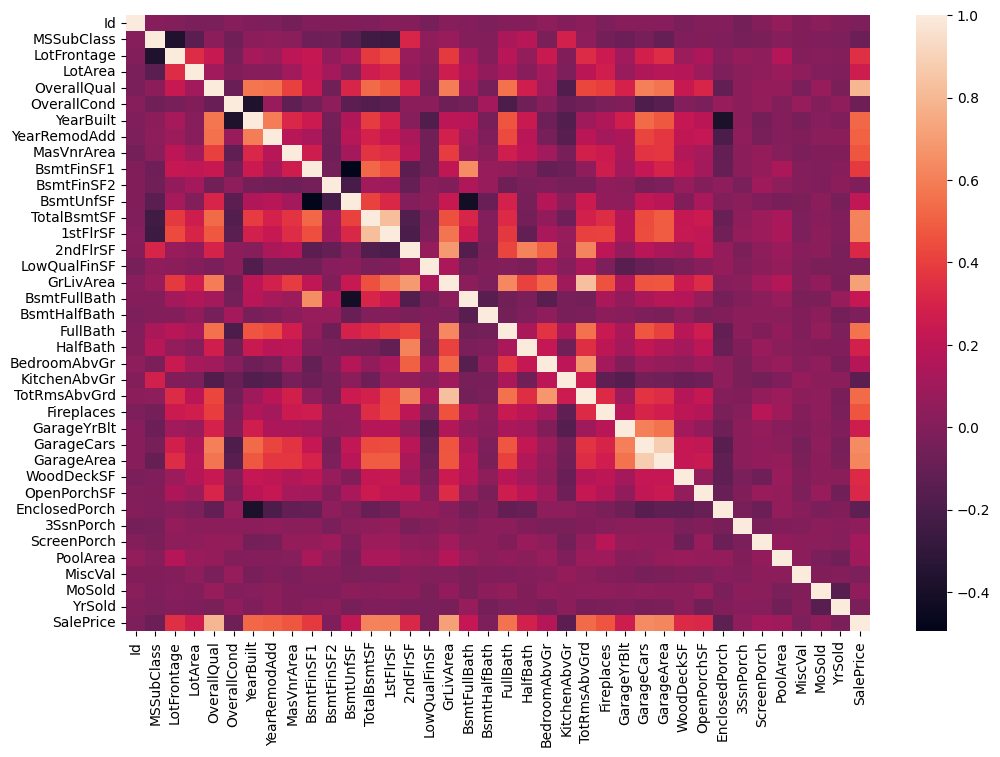

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(train[numerical_col].corr())
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11976\382788583.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


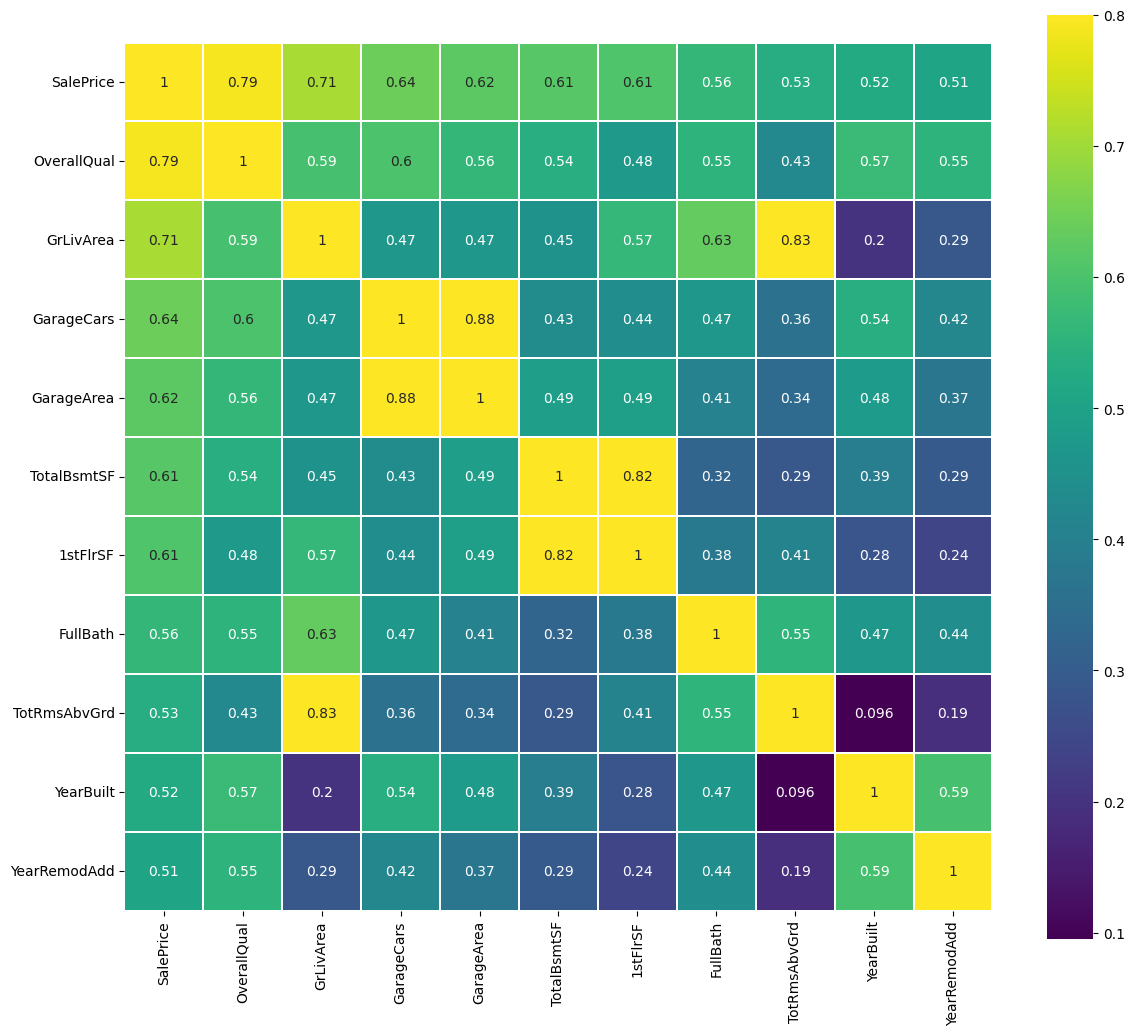

In [30]:
k = 11
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)

f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor='white', xticklabels=cols, yticklabels=cols)

plt.show()

The heatmap indicates that certain features are highly correlated with each other, exhibiting multicollinearity. Specifically:

* GarageCars and GarageArea are highly correlated.
* TotalBsmtSF and 1stFlrSF are highly correlated.
* TotalRmsAbvGrd and GrLivArea are highly correlated, with a correlation coefficient greater than 0.80.

Multicollinearity occurs when two or more predictor variables (features) in a dataset are highly correlated, meaning they provide redundant information. This can negatively impact the accuracy and interpretability of predictive models because it can cause instability in the regression coefficients, making it difficult to determine the individual effect of each feature.

To mitigate this issue, it's essential to select features that are less collinear for model training. The best features identified for predicting SalePrice are: OverallQual, GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, and YearRemodAdd. These features have been chosen to minimize multicollinearity and enhance model performance.

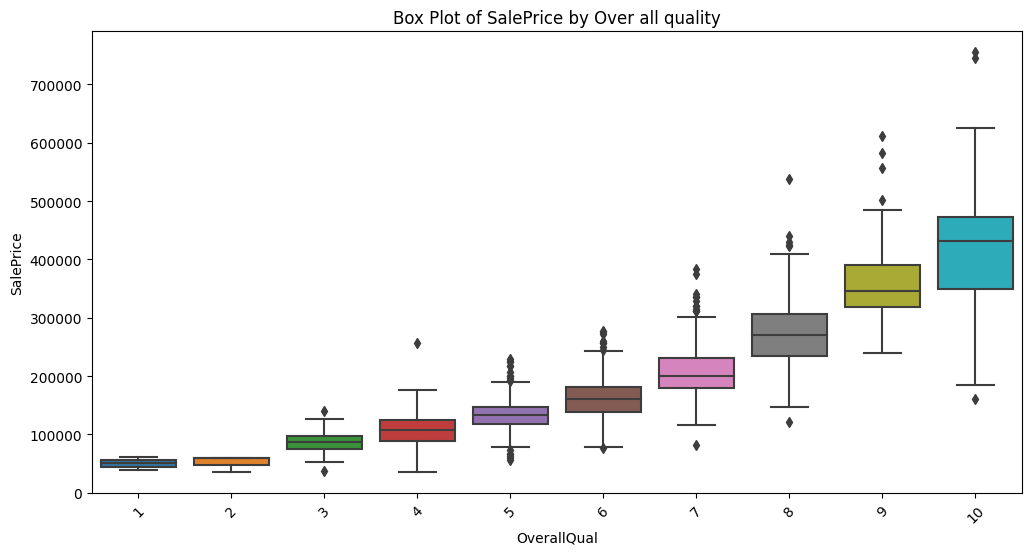

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title('Box Plot of SalePrice by Over all quality')
plt.show()


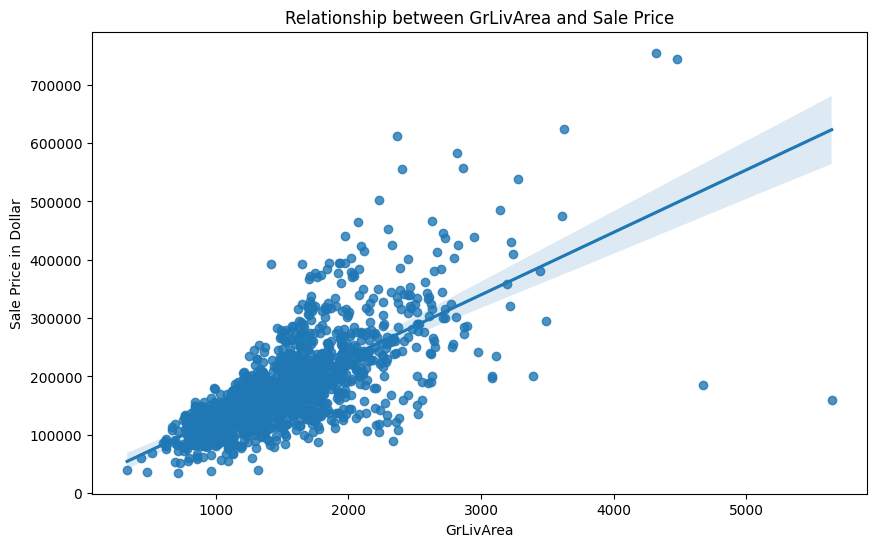

In [32]:
plt.figure(figsize=(10, 6))

sns.regplot(x='GrLivArea', y='SalePrice',data=train,scatter=True,fit_reg=True)

plt.title('Relationship between GrLivArea and Sale Price')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price in Dollar')
plt.show()

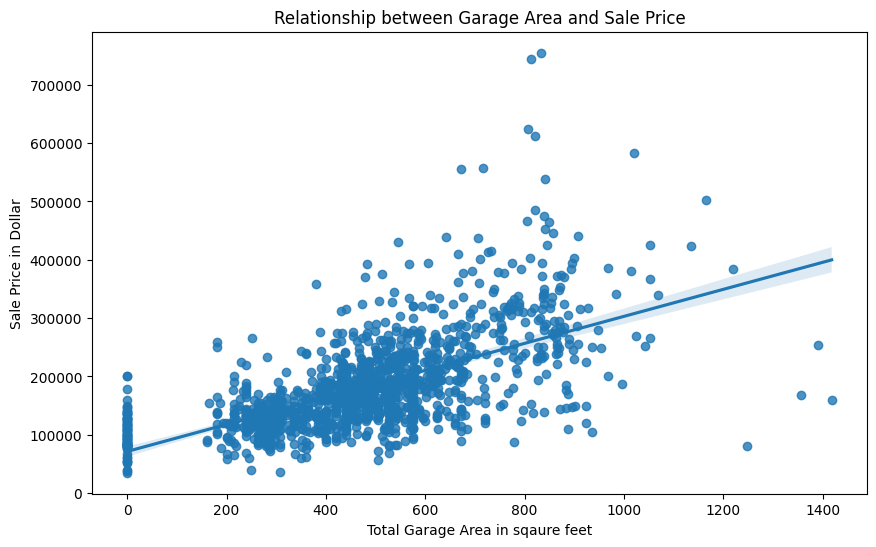

In [33]:
plt.figure(figsize=(10, 6))

sns.regplot(x='GarageArea', y='SalePrice',data=train,scatter=True,fit_reg=True)



plt.title('Relationship between Garage Area and Sale Price')
plt.xlabel('Total Garage Area in sqaure feet')
plt.ylabel('Sale Price in Dollar')
plt.show()

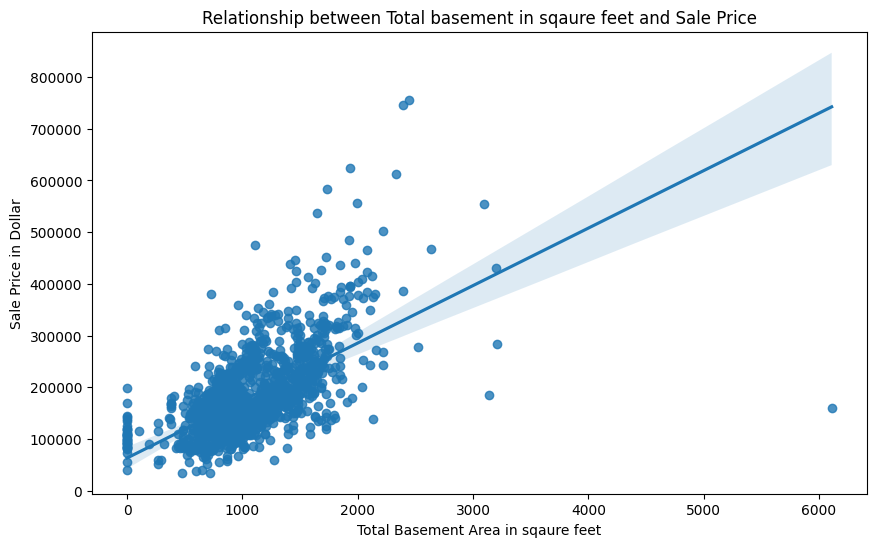

In [34]:
plt.figure(figsize=(10, 6))

sns.regplot(x='TotalBsmtSF', y='SalePrice', data=train,scatter=True,fit_reg=True)


plt.title('Relationship between Total basement in sqaure feet and Sale Price')
plt.xlabel('Total Basement Area in sqaure feet')
plt.ylabel('Sale Price in Dollar')
plt.show()

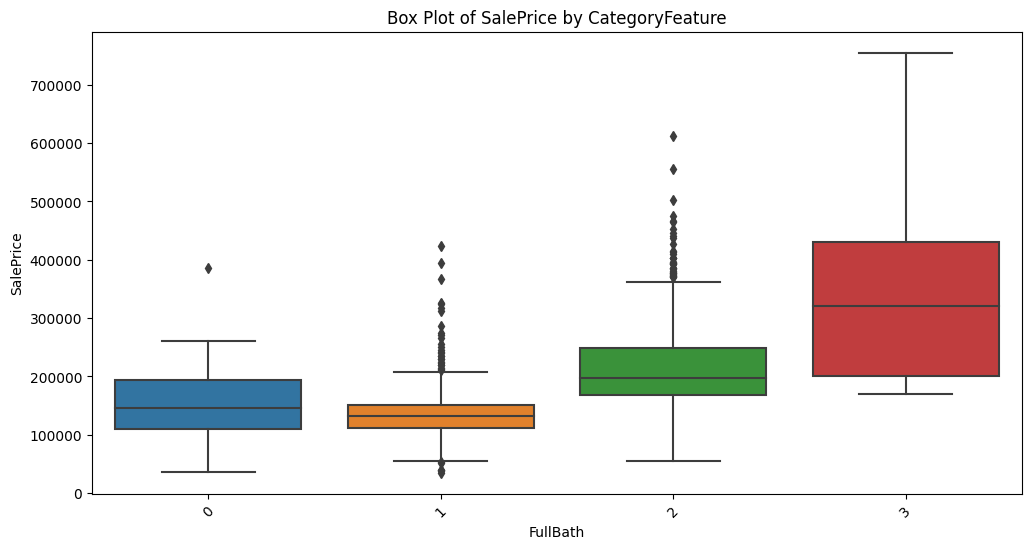

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='FullBath', y='SalePrice', data=train)
plt.xticks(rotation=45)
plt.title('Box Plot of SalePrice by CategoryFeature')
plt.show()

<Figure size 1000x500 with 0 Axes>

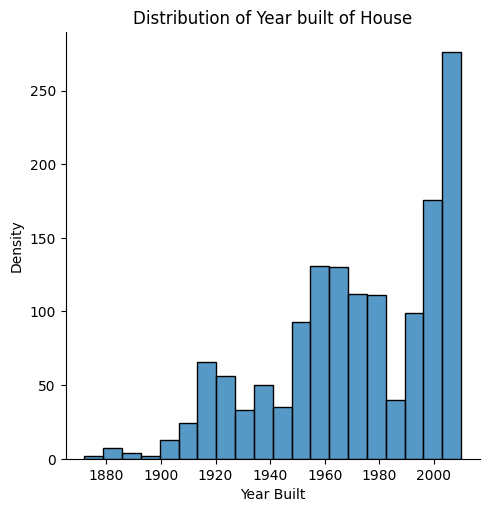

In [36]:
plt.figure(figsize=(10,5))
sns.displot(train['YearBuilt'],bins=20)
plt.title('Distribution of Year built of House')
plt.xlabel('Year Built')
plt.ylabel('Density')
plt.show()


In [37]:
train['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

<Figure size 1000x500 with 0 Axes>

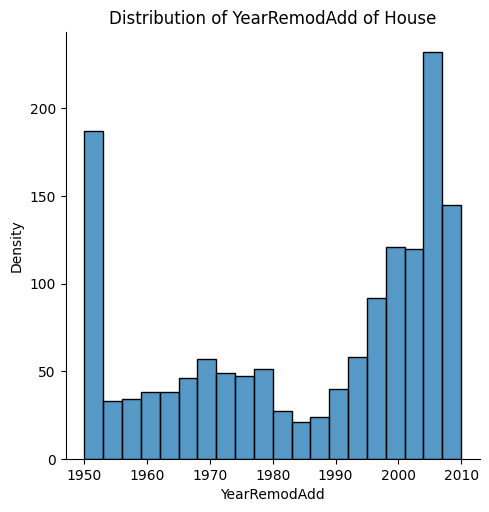

In [38]:
plt.figure(figsize=(10,5))
sns.displot(train['YearRemodAdd'],bins=20)
plt.title('Distribution of YearRemodAdd of House')
plt.xlabel('YearRemodAdd')
plt.ylabel('Density')
plt.show()

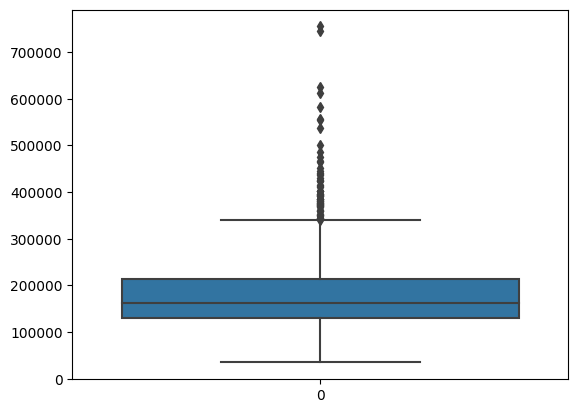

In [39]:
sns.boxplot(train['SalePrice'])
plt.show()

In [40]:
train['SalePrice'].min()

34900

In [41]:
train['SalePrice'].max()

755000

In [42]:
train['SalePrice'].mean()

180921.19589041095

In [43]:
Q1 = train['SalePrice'].quantile(0.25)
Q3 = train['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR

df_clean_iqr = train[(train['SalePrice'] >= lower_iqr) & (train['SalePrice'] <= upper_iqr)].reset_index(drop=True)

"Cleaned DataFrame shape using IQR approach:", df_clean_iqr.shape

('Cleaned DataFrame shape using IQR approach:', (1399, 81))

In [44]:
test.shape

(1459, 80)

In [45]:

X= train[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']]
y=train['SalePrice']
X_test= test[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']]

In [46]:
linReg=LinearRegression()
ridreg= Ridge()
lasso= Lasso()
RanForReg=RandomForestRegressor()
Gradboost= GradientBoostingRegressor()


## Cross Validating Data

In [47]:
m1= cross_val_score(linReg,X,y,cv=5,scoring='r2')
print(m1)
np.mean(m1)

[0.82284633 0.78926673 0.78229242 0.78352962 0.6260437 ]


0.7607957584318867

In [48]:
m2= cross_val_score(ridreg,X,y,cv=5,scoring='r2')
print(m2)
np.mean(m2)

[0.82284675 0.78927717 0.7823285  0.78355518 0.6260104 ]


0.7608035996194087

In [49]:
m3=cross_val_score(lasso,X,y,cv=5,scoring='r2')
print(m3)
np.mean(m3)

[0.82284026 0.78926741 0.78229589 0.78353036 0.62604415]


0.7607956119957129

In [50]:
m4=cross_val_score(RanForReg,X,y,cv=5,scoring='r2')
print(m4)
np.mean(m4)

[0.83662778 0.75979056 0.86716076 0.87362964 0.82326119]


0.8320939862453919

In [51]:
m5=cross_val_score(Gradboost,X,y,cv=5,scoring='r2')
print(m5)
np.mean(m5)

[0.86389988 0.78054552 0.88099288 0.88430352 0.8628782 ]


0.8545240005587728

* So from all 5 models Gradient boosting model performed good and gave better results then rest 

## Using Gradient Boosting Regressor to predict the test data values

In [52]:
Gradboost.fit(X,y)

GradientBoostingRegressor()

In [53]:
y_pred= Gradboost.predict(X_test)


In [54]:
test['SalePrice']=y_pred

In [55]:
submission= test[['Id','SalePrice']]

In [56]:
submission

,Id,SalePrice
0,1461,128147.565395
1,1462,143977.548893
2,1463,163233.224437
3,1464,177469.656352
4,1465,207578.912759
...,...,...
1454,2915,81024.465673
1455,2916,90050.667344
1456,2917,156831.965267
1457,2918,119365.947624


In [57]:
submission.to_csv('submission.csv',index=False)